In [2]:
import numpy as np
import pandas as pd

In [7]:
#loadthe dataset
data=pd.read_csv("C:/Users/HP/Downloads/SMSSpamCollection",
                 sep='\t',names=['Status','Messages'])

In [9]:
data.head()

,Status,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data['Status'].value_counts()

ham     4825
spam     747
Name: Status, dtype: int64

In [14]:
data['length']=data['Messages'].apply(len)
data.head()

,Status,Messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

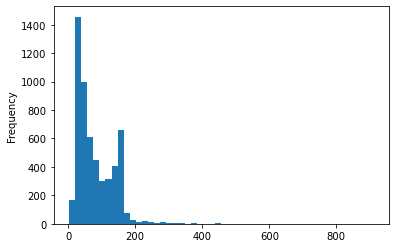

In [24]:
data['length'].plot(kind='hist',bins=50)

In [25]:
data['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

## Text Pre-processing

## we use some NLP technique for text preprocessing

#### Since the model dosent able to understand the word so we have to convert into numerical feature so for that we use
#### factorization(bag of words (count vectorizer or Tf-Idf)
#### we also have to apply "stop words " to remove the un-neccasary words from the messages
#### we also apply the stemming and lemmitising process to reduce the size of the words which is easy to understand

In [47]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [34]:
#for un-neccesary stopwords
words=stopwords.words('english')
words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [48]:
stem=PorterStemmer()
cleaned=[]

In [52]:
for i in range(0,len(data)):
    spam=re.sub('[^a-zA-Z]','',data['Messages'][i])
    spam=spam.lower()
    spam=spam.split()
    spam=[stem.stem(word) for word in spam if word not in set(words)]
    spam=''.join(spam)
    cleaned.append(spam)

In [54]:
cleaned

['gountiljurongpointcrazyavailableonlyinbugisngreatworldlaebuffetcinetheregotamorewat',
 'oklarjokingwifuoni',
 'freeentryinawklycomptowinfacupfinaltktsstmaytextfatotoreceiveentryquestionstdtxtratetcsapplyov',
 'udunsaysoearlyhorucalreadythensay',
 'nahidontthinkhegoestousfhelivesaroundherethough',
 'freemsgheytheredarlingitsbeenweeksnowandnowordbackidlikesomefunyouupforitstilltbokxxxstdchgstosendtorcv',
 'evenmybrotherisnotliketospeakwithmetheytreatmelikeaidspat',
 'asperyourrequestmellemelleoruminnaminungintenurunguvettamhasbeensetasyourcallertuneforallcallerspresstocopyyourfriendscallertun',
 'winnerasavaluednetworkcustomeryouhavebeenselectedtoreceiveaprizerewardtoclaimcallclaimcodeklvalidhoursonli',
 'hadyourmobilemonthsormoreurentitledtoupdatetothelatestcolourmobileswithcameraforfreecallthemobileupdatecofreeon',
 'imgonnabehomesoonandidontwanttotalkaboutthisstuffanymoretonightkivecriedenoughtoday',
 'sixchancestowincashfromtopoundstxtcshandsendtocostpdaydaystsandcsapplyreplyhlinfo

In [ ]:
#Vectorization

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

In [57]:
cv=CountVectorizer()

In [60]:
X=cv.fit_transform(cleaned).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [64]:
print(cv.get_feature_names())

['aahacuddlewouldbelushidneedlotsofteaandsoupbeforeanykindoffumbl', 'aahblesshowsyourarm', 'aaoooorightareyouatwork', 'aathiwhereareyoudear', 'abegmakeprofitbutitsastartareyouusingittogetsponsorsforthenextev', 'abitofursmileismyhppnssadropofurtearismysorrowapartofurheartismylifeaheartlikeminewilcareforuforevrasmygoodfriend', 'ablooblooblooillmissthefirstbowl', 'aboutltgtbucksthebanksfeesarefixedbettertocallthebankandfindout', 'aboylovedagalhepropsdbtshedidntmindhegvlvlttrsbtherfrndsthrewthmagaindboydecidedaproachdgaldttimeatruckwasspeedingtowardsdgalwnitwasabouthitdgirldboyranlikehellnsavedhersheaskedhwcnurunsofastdboyrepliedboostisdsecretofmyenergyninstantlydgirlshoutedourenergynthylivedhappilygthrdrinkingboostevrydymoralofdstoryihvfreemsgsdgudni', 'aboywaslatehomehisfatherpoweroffrndship', 'accordinglyirepeatjusttextthewordokonyourmobilephoneandsend', 'actuallyfuckthatjustdowhateverdofindanexcusetobeintampaatsomepointbeforejanuarythough', 'actuallygettingreadytoleavethehous', 'actual

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [75]:
y=pd.get_dummies(data['Status'])
Y=y.drop('ham',axis=1)
Y.head()

,spam
0,0
1,0
2,1
3,0
4,0


In [76]:
#training the model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=25)

In [79]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457, 5080)
(1115, 5080)
(4457, 1)
(1115, 1)


In [81]:
Nb=MultinomialNB()
Nb.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [83]:
y_pred=Nb.predict(x_test)

In [84]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [86]:
acuracy=accuracy_score(y_test,y_pred)
acuracy * 100

86.00896860986546

In [87]:
matrix=confusion_matrix(y_test,y_pred)
matrix

array([[958,   0],
       [156,   1]], dtype=int64)

In [88]:
classification_rreport=classification_report(y_test,y_pred)
print(classification_rreport)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       958
           1       1.00      0.01      0.01       157

    accuracy                           0.86      1115
   macro avg       0.93      0.50      0.47      1115
weighted avg       0.88      0.86      0.80      1115

